## LSTM Model

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pickle

with open('/content/drive/My Drive/eng_df_300k.pkl', 'rb') as f:
    eng_df = pickle.load(f)

In [ ]:
eng_df.head()

,review_text,rating,input_ids,attention_mask,word_embeddings
0,Mind blowingly cool. Best science fiction I've...,5,"[tensor(101), tensor(2568), tensor(11221), ten...","[tensor(1), tensor(1), tensor(1), tensor(1), t...","[0.07275456, 0.048345067, 0.069500506, 0.08391..."
1,This is a special book. It started slow for ab...,5,"[tensor(101), tensor(2023), tensor(2003), tens...","[tensor(1), tensor(1), tensor(1), tensor(1), t...","[-0.10508166, 0.044605456, 0.15093496, 0.08727..."
2,I haven't read a fun mystery book in a while a...,3,"[tensor(101), tensor(1045), tensor(4033), tens...","[tensor(1), tensor(1), tensor(1), tensor(1), t...","[0.09070881, 0.02698918, 0.079526536, 0.053992..."
3,"Fun, fast paced, and disturbing tale of murder...",4,"[tensor(101), tensor(4569), tensor(1010), tens...","[tensor(1), tensor(1), tensor(1), tensor(1), t...","[0.12166318, 0.026309181, 0.16683182, 0.057287..."
4,A fun book that gives you a sense of living in...,4,"[tensor(101), tensor(1037), tensor(4569), tens...","[tensor(1), tensor(1), tensor(1), tensor(1), t...","[0.12523821, 0.0054550497, 0.047890987, 0.1243..."


In [ ]:
X = np.vstack(eng_df['word_embeddings'].values)
y = eng_df['rating'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the input shape for the LSTM layer
input_shape = (X_train.shape[1], X_train.shape[2])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
3624/3624 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - loss: 1.4156 - val_loss: 0.6928 - learning_rate: 0.0010
Epoch 2/20
3624/3624 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - loss: 0.7901 - val_loss: 0.6250 - learning_rate: 0.0010
Epoch 3/20
3624/3624 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - loss: 0.6912 - val_loss: 0.6194 - learning_rate: 0.0010
Epoch 4/20
3624/3624 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - loss: 0.6504 - val_loss: 0.6193 - learning_rate: 0.0010
Epoch 5/20
3624/3624 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - loss: 0.6302 - val_loss: 0.6218 - learning_rate: 0.0010
Epoch 6/20
3624/3624 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - loss: 0.6111 - val_loss: 0.6210 - learning_rate: 0.0010
Epoch 7/20
3624/3624 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - loss: 0.6008 - val_loss: 0.6495 - learning_rate: 0.0010
Epoch 8/20
3624/3624 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - loss: 0.5781 - val_loss: 0.6116 - learning_rate: 5.0000e-04
Epoch 9/20
3624/3624 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - loss: 0.5677 - val_loss: 0.5955 - l

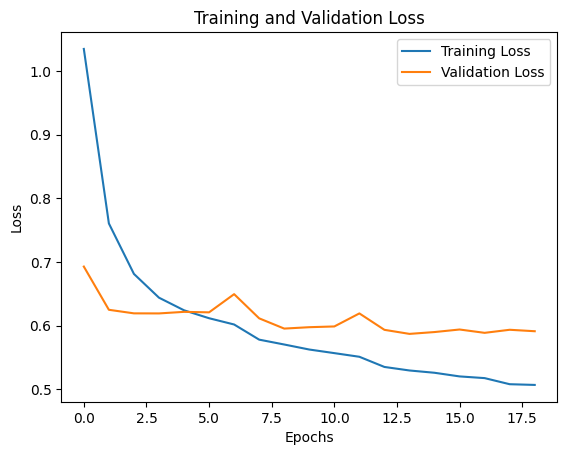

1812/1812 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Mean Squared Error: 0.5872


In [ ]:
# Build the LSTM model
from keras.optimizers import Adam
from keras.layers import BatchNormalization
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras.layers import LeakyReLU
from keras.layers import Bidirectional, LSTM
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

#model.add(Embedding(len(tokenizer.word_index) + 1, 100))

model.add(Bidirectional(LSTM(128, input_shape = input_shape, return_sequences = True)))
model.add(Dropout(0.3))
model.add(LSTM(128))
model.add(Dropout(0.3))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(1))

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), verbose=True, callbacks=[early_stopping, lr_scheduler])
#history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=True)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

In [ ]:
import pickle

with open('model_300k_BS64_Drop03.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
y_pred_rounded = np.round(y_pred)
y_pred_clipped = np.clip(y_pred_rounded, 1, 5)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_clipped)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.5128
